* Data comes from https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

In this notebook I will look at COVID-19 data for the three states that had the most searches for Netflix. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid_df = pd.read_csv('../data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [3]:
covid_df.shape

(18942, 15)

In [4]:
covid_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


The table looks at COVID cases in each state throughout the pandemic. There are many columns but I am focusing on the new cases column as that measure has the most impact on the response from the states. 

In [5]:
# convert these data to weekly data

# subset to the states of interest


In [6]:
covid_df2=covid_df.set_index(pd.to_datetime(covid_df['submission_date']))

In [7]:
covid_weekly_df=covid_df2.groupby('state').resample('7D')['new_case'].sum().unstack(0)

Text(0.5, 1.0, 'New Covid-19 Cases')

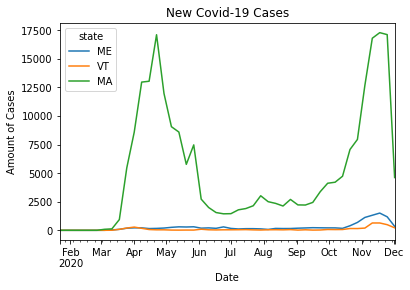

In [8]:
state_cols = ['ME', 'VT', 'MA']

covid_weekly_df[state_cols].plot()
plt.xlabel('Date')
plt.ylabel('Amount of Cases')
plt.title('New Covid-19 Cases')

I am focusing on the three states that searched for Netflix the most and taking a look at their weekly reports of new COVID cases. At a first glance it looks odd that MA has an extremely larger amount of cases than the other two states because MA fell behind them in Netflix searches however it is important to take into consideration the population of the states. MA has a population of about 6.3 million according to the 2020 U.S. Census while VT has a population of only ~650,000. ME has a population around 1.3 million according to the U.S. Census so after greater consideration it iis not surprising that MA has many more cases reported than ME and VT

Text(0.5, 1.0, 'New Covid-19 Cases in Vermont')

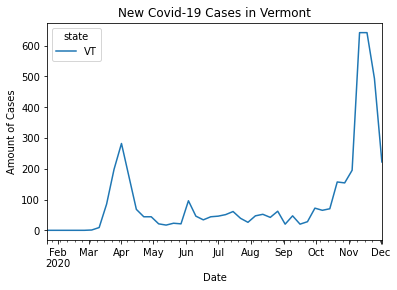

In [9]:
state_cols = ['VT']

covid_weekly_df[state_cols].plot()
plt.xlabel('Date')
plt.ylabel('Amount of Cases')
plt.title('New Covid-19 Cases in Vermont')

The graph of the VT new COVID case time-line is not surprising because the second biggest peak takes place towards the beginning of the pandemic and happens to align with its Netflix search trends. The largest peak took place around this past Thanksgiving which is not surprising as many people were traveling and congregating. 

Text(0.5, 1.0, 'New Covid-19 Cases in Maine')

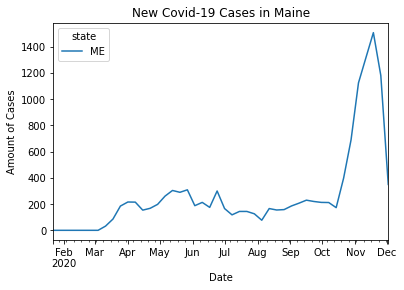

In [10]:
state_cols = ['ME']

covid_weekly_df[state_cols].plot()
plt.xlabel('Date')
plt.ylabel('Amount of Cases')
plt.title('New Covid-19 Cases in Maine')

The graph for Maine's time-line is similar to that of the Vermont time-line. They had peaks during similar times however their numbers are slightly off. Maine was hit harder during the summer than Vermont was. 

Text(0.5, 1.0, 'New Covid-19 Cases in Massachusetts')

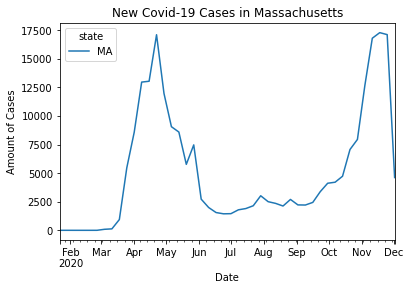

In [11]:
state_cols = ['MA']

covid_weekly_df[state_cols].plot()
plt.xlabel('Date')
plt.ylabel('Amount of Cases')
plt.title('New Covid-19 Cases in Massachusetts')

In [12]:
# find state population data sheet

covid_weekly_df[state_cols]

state,MA
submission_date,
2020-01-22,0
2020-01-29,1
2020-02-05,0
2020-02-12,0
2020-02-19,0
2020-02-26,1
2020-03-04,89
2020-03-11,127
2020-03-18,941


The table above shows new COVID cases reported weekly for the three states. For all three states, the week of 11/18/20 brought the most new COVID cases. The surrounding weeks also brought high numbers and seems to have started to increase greatly the week of 10/21/20 which could have to do with Halloween and people going out more and celebrating in large groups. The second highest peak in VT took place the first week of April which was right around when Maine's cases began too increase as well. The second highest peak in Massachusetts came three weeks after, the week of 4/22/20. 